<a href="https://colab.research.google.com/github/douboNg/IS403/blob/main/ACB_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import tensorflow as tf

In [130]:
df = pd.read_csv('/content/ACB.VN-BaoCao.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,8533.238281,8619.142578,8447.333008,8590.507813,8254.484375,5164405.0
1,2019-03-04,8590.507813,8733.682617,8561.873047,8705.047852,8364.543945,10898750.0
2,2019-03-05,8705.047852,8790.953125,8619.142578,8676.413086,8337.029297,8611453.0
3,2019-03-06,8647.778320,8705.047852,8590.507813,8676.413086,8337.029297,11100248.0
4,2019-03-07,8705.047852,8790.953125,8676.413086,8733.682617,8392.058594,11530669.0


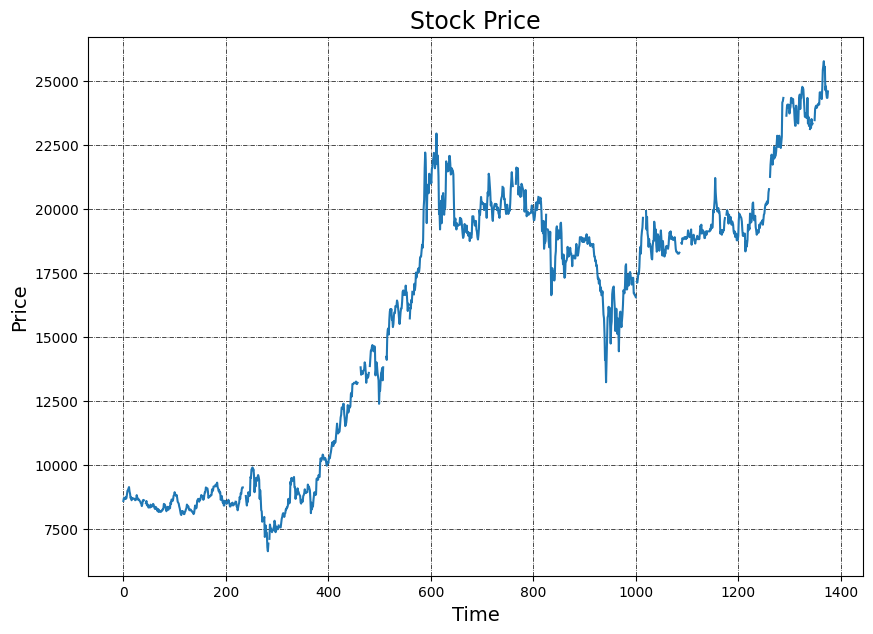

In [105]:
df['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [131]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Train test 8:2

In [132]:
# Split data into train and test sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [134]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

In [135]:
X_train, y_train

(array([[   0],
        [   1],
        [   2],
        ...,
        [1047],
        [1048],
        [1049]]),
 array([ 8590.507813,  8705.047852,  8676.413086, ..., 18827.976563,
        18903.591797, 18865.785156]))

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [137]:
# Define the model
def build_model(input_dim):
    model = Sequential()
    # Using a smaller standard deviation for the normal initializer
    model.add(Dense(1, input_dim=input_dim, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), activation='linear'))
    # Increased learning rate
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

# Build and train the model
model = build_model(input_dim=1)
model.fit(X_train, y_train, epochs=100, verbose=0, batch_size=5)

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())

# Output the model summary to check the structure
print('---------Model summary----------')
model.summary()
model.get_weights()

9/9 [==============================] - 0s 2ms/step
Predictions: [19615.035 19633.7   19652.361 19671.023 19689.686 19708.348 19727.01
 19745.672 19764.334 19782.996 19801.658 19820.32  19838.982 19857.645
 19876.307 19894.969 19913.63  19932.293 19950.957 19969.62  19988.281
 20006.943 20025.605 20044.268 20062.93  20081.592 20100.254 20118.916
 20137.578 20156.24  20174.902 20193.564 20212.227 20230.889 20249.55
 20268.215 20286.877 20305.54  20324.201 20342.863 20361.525 20380.188
 20398.85  20417.512 20436.174 20454.836 20473.498 20492.16  20510.822
 20529.484 20548.146 20566.809 20585.47  20604.135 20622.797 20641.459
 20660.121 20678.783 20697.445 20716.107 20734.77  20753.432 20772.094
 20790.756 20809.418 20828.08  20846.742 20865.404 20884.066 20902.729
 20921.393 20940.055 20958.717 20977.379 20996.041 21014.703 21033.365
 21052.027 21070.69  21089.352 21108.014 21126.676 21145.338 21164.
 21182.662 21201.324 21219.986 21238.65  21257.312 21275.975 21294.637
 21313.299 21331.9

[array([[18.662222]], dtype=float32), array([19.703566], dtype=float32)]

In [138]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 90 days
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)



3/3 [==============================] - 0s 3ms/step


In [139]:
from sklearn.metrics import mean_absolute_error

# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.062
MAE: 1245.905
RMSE: 1518.7
MSLE: 0.005
-------------------


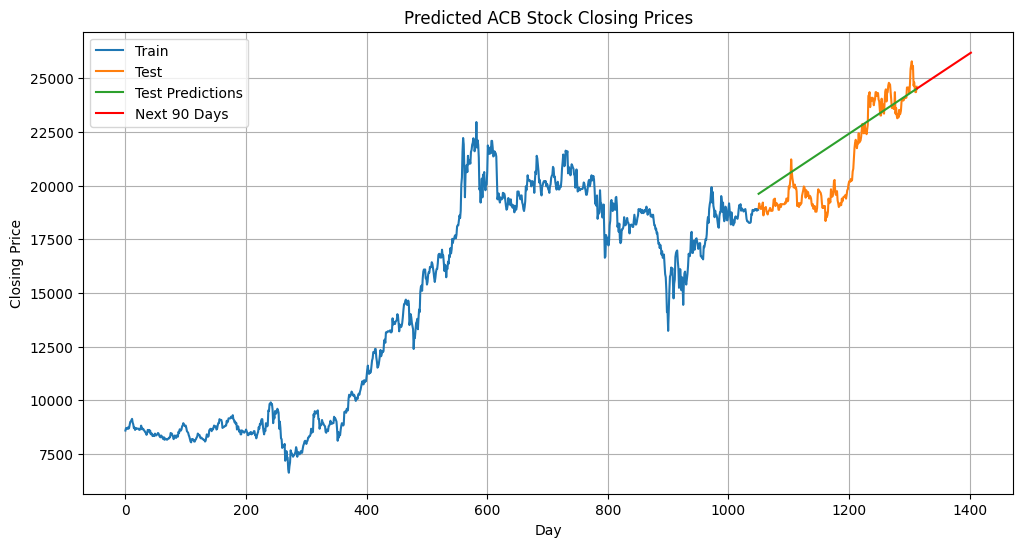

In [140]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')

# Adding titles and labels
plt.title('Predicted ACB Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Train test 7:3

In [ ]:
# Split data into train and test sets
train_size = int(len(df) * 0.7)
train_data, test_data = df[:train_size], df[train_size:]

In [ ]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
# Define the model
def build_model(input_dim):
    model = Sequential()
    # Using a smaller standard deviation for the normal initializer
    model.add(Dense(1, input_dim=input_dim, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), activation='linear'))
    # Increased learning rate
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Build and train the model
model = build_model(input_dim=1)
model.fit(X_train, y_train, epochs=100, verbose=0, batch_size=5)

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())

# Output the model summary to check the structure
print('---------Model summary----------')
model.summary()
model.get_weights()

13/13 [==============================] - 0s 2ms/step
Predictions: [15230.645  15247.199  15263.753  15280.308  15296.861  15313.415
 15329.97   15346.523  15363.077  15379.632  15396.186  15412.739
 15429.294  15445.848  15462.401  15478.956  15495.51   15512.063
 15528.618  15545.172  15561.726  15578.28   15594.834  15611.388
 15627.942  15644.496  15661.051  15677.6045 15694.158  15710.713
 15727.267  15743.82   15760.375  15776.929  15793.482  15810.037
 15826.591  15843.145  15859.699  15876.253  15892.807  15909.361
 15925.915  15942.469  15959.023  15975.577  15992.131  16008.686
 16025.239  16041.794  16058.348  16074.901  16091.456  16108.01
 16124.563  16141.118  16157.672  16174.226  16190.78   16207.334
 16223.888  16240.442  16256.996  16273.55   16290.1045 16306.658
 16323.212  16339.767  16356.32   16372.874  16389.428  16405.982
 16422.537  16439.09   16455.645  16472.2    16488.752  16505.307
 16521.861  16538.414  16554.969  16571.523  16588.078  16604.63
 16621.186  

[array([[16.55405]], dtype=float32), array([17.472504], dtype=float32)]

In [ ]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 90 days
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)



3/3 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.079
MAE: 1645.276
RMSE: 1940.258
MSLE: 0.009
-------------------


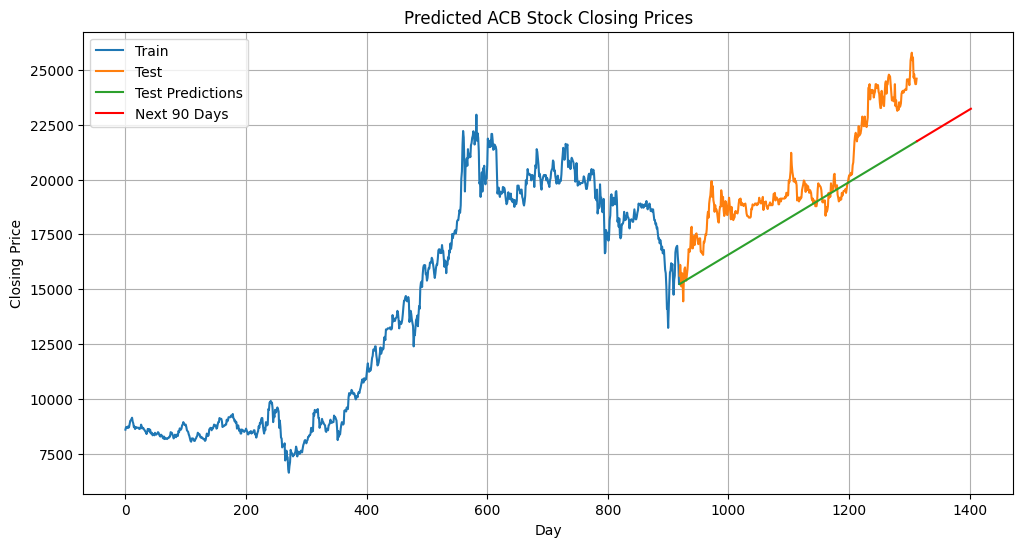

In [ ]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')

# Adding titles and labels
plt.title('Predicted ACB Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Train test 9:1

In [ ]:
# Split data into train and test sets
train_size = int(len(df) * 0.9)
train_data, test_data = df[:train_size], df[train_size:]

In [ ]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
# Define the model
def build_model(input_dim):
    model = Sequential()
    # Using a smaller standard deviation for the normal initializer
    model.add(Dense(1, input_dim=input_dim, kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), activation='linear'))
    # Increased learning rate
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Build and train the model
model = build_model(input_dim=1)
model.fit(X_train, y_train, epochs=100, verbose=0, batch_size=5)

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())

# Output the model summary to check the structure
print('---------Model summary----------')
model.summary()
model.get_weights()

5/5 [==============================] - 0s 3ms/step
Predictions: [23952.078 23972.342 23992.604 24012.867 24033.129 24053.393 24073.654
 24093.918 24114.182 24134.443 24154.707 24174.969 24195.232 24215.494
 24235.758 24256.02  24276.283 24296.545 24316.809 24337.072 24357.334
 24377.598 24397.86  24418.123 24438.385 24458.648 24478.91  24499.174
 24519.438 24539.7   24559.963 24580.225 24600.488 24620.75  24641.014
 24661.275 24681.54  24701.8   24722.064 24742.328 24762.59  24782.854
 24803.115 24823.379 24843.64  24863.904 24884.166 24904.43  24924.693
 24944.955 24965.219 24985.48  25005.744 25026.006 25046.27  25066.531
 25086.795 25107.057 25127.32  25147.584 25167.846 25188.11  25208.371
 25228.635 25248.896 25269.16  25289.422 25309.686 25329.947 25350.21
 25370.475 25390.736 25411.    25431.262 25451.525 25471.787 25492.05
 25512.312 25532.576 25552.84  25573.102 25593.365 25613.627 25633.89
 25654.152 25674.416 25694.678 25714.941 25735.203 25755.467 25775.73
 25795.992 25816.

[array([[20.26279]], dtype=float32), array([21.721952], dtype=float32)]

In [ ]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 90 days
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)



3/3 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.111
MAE: 2410.797
RMSE: 2705.057
MSLE: 0.014
-------------------


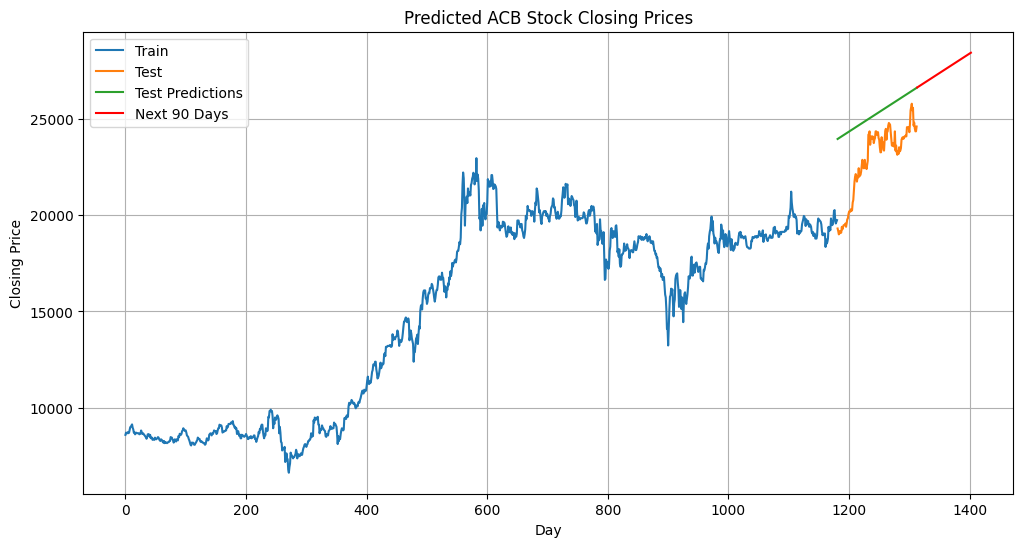

In [ ]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')

# Adding titles and labels
plt.title('Predicted ACB Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()